**Set up Google Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   Change directory to my google drive




In [ ]:
%cd "/content/drive/My Drive/"

/content/drive/My Drive


**Dataset Downloading**



*   First, Clone the repo to my google drive.




In [ ]:
!git clone https://github.com/udacity/dermatologist-ai.git

Cloning into 'dermatologist-ai'...
remote: Enumerating objects: 33, done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 33
Unpacking objects: 100% (33/33), done.




*   Change directory to the project files:



In [ ]:
%cd /content/drive/My Drive/dermatologist-ai

/content/drive/My Drive/dermatologist-ai



*   create a data/ folder to hold the dataset of skin images

In [ ]:
!mkdir data

In [ ]:
!pwd

/content/drive/My Drive/dermatologist-ai




*   Download the dataset at dermatologist-ai/data/ using GNU Wget software package for retrieving files using HTTPS protocol.

In [ ]:
!wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/train.zip
!wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/valid.zip
!wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/test.zip

--2020-10-26 14:10:32--  https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/train.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.120.8
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.120.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5736557430 (5.3G) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>]   5.34G  36.8MB/s    in 1m 56s  

2020-10-26 14:12:33 (47.3 MB/s) - ‘train.zip’ saved [5736557430/5736557430]

--2020-10-26 14:12:33--  https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/valid.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.113.8
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.113.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 864538487 (824M) [application/zip]
Saving to: ‘valid.zip’

valid.zip           100%[==========



*   Extract the zip files




In [ ]:
!unzip train.zip 
!unzip test.zip 
!unzip valid.zip

Archive:  train.zip
   creating: train/
   creating: train/melanoma/
  inflating: train/melanoma/ISIC_0010034.jpg  
  inflating: train/melanoma/ISIC_0014795.jpg  
  inflating: train/melanoma/ISIC_0010194.jpg  
  inflating: train/melanoma/ISIC_0015166.jpg  
  inflating: train/melanoma/ISIC_0014163.jpg  
  inflating: train/melanoma/ISIC_0010081.jpg  
  inflating: train/melanoma/ISIC_0015190.jpg  
  inflating: train/melanoma/ISIC_0000445.jpg  
  inflating: train/melanoma/ISIC_0000390.jpg  
  inflating: train/melanoma/ISIC_0000289.jpg  
  inflating: train/melanoma/ISIC_0000466.jpg  
  inflating: train/melanoma/ISIC_0014324.jpg  
  inflating: train/melanoma/ISIC_0013671.jpg  
  inflating: train/melanoma/ISIC_0000171.jpg  
  inflating: train/melanoma/ISIC_0013184.jpg  
  inflating: train/melanoma/ISIC_0000004.jpg  
  inflating: train/melanoma/ISIC_0000049.jpg  
  inflating: train/melanoma/ISIC_0000153.jpg  
  inflating: train/melanoma/ISIC_0013775.jpg  
  inflating: train/melanoma/ISIC_00004


*   Delete the zip files because we won't need it again

In [ ]:
!rm "/content/drive/My Drive/dermatologist-ai/train.zip"
!rm "/content/drive/My Drive/dermatologist-ai/valid.zip"
!rm "/content/drive/My Drive/dermatologist-ai/test.zip"


*   Move train,test and valid folders to data/ folder

In [ ]:
!mv "/content/drive/My Drive/dermatologist-ai/train" "/content/drive/My Drive/dermatologist-ai/data/"

In [ ]:
!mv "/content/drive/My Drive/dermatologist-ai/test" "/content/drive/My Drive/dermatologist-ai/data/"

In [ ]:
!mv "/content/drive/My Drive/dermatologist-ai/valid" "/content/drive/My Drive/dermatologist-ai/data/"

**Import libraries**

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
import numpy as np
from torch import nn
from torch import optim
import torch.nn.functional as F
from collections import OrderedDict

from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler

**Specify Data Loaders`**

In [ ]:
batch_size = 32
#Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(299),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([ transforms.Resize(299),
                                      transforms.CenterCrop(299),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder('data/train/', transform=train_transforms)
valid_data = datasets.ImageFolder('data/valid/', transform=train_transforms)
test_data = datasets.ImageFolder('data/test/', transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data,batch_size=batch_size,shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,shuffle=False)

classes = ['melanoma','nevus','seborrheic_keratosis']

**Visualize images**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

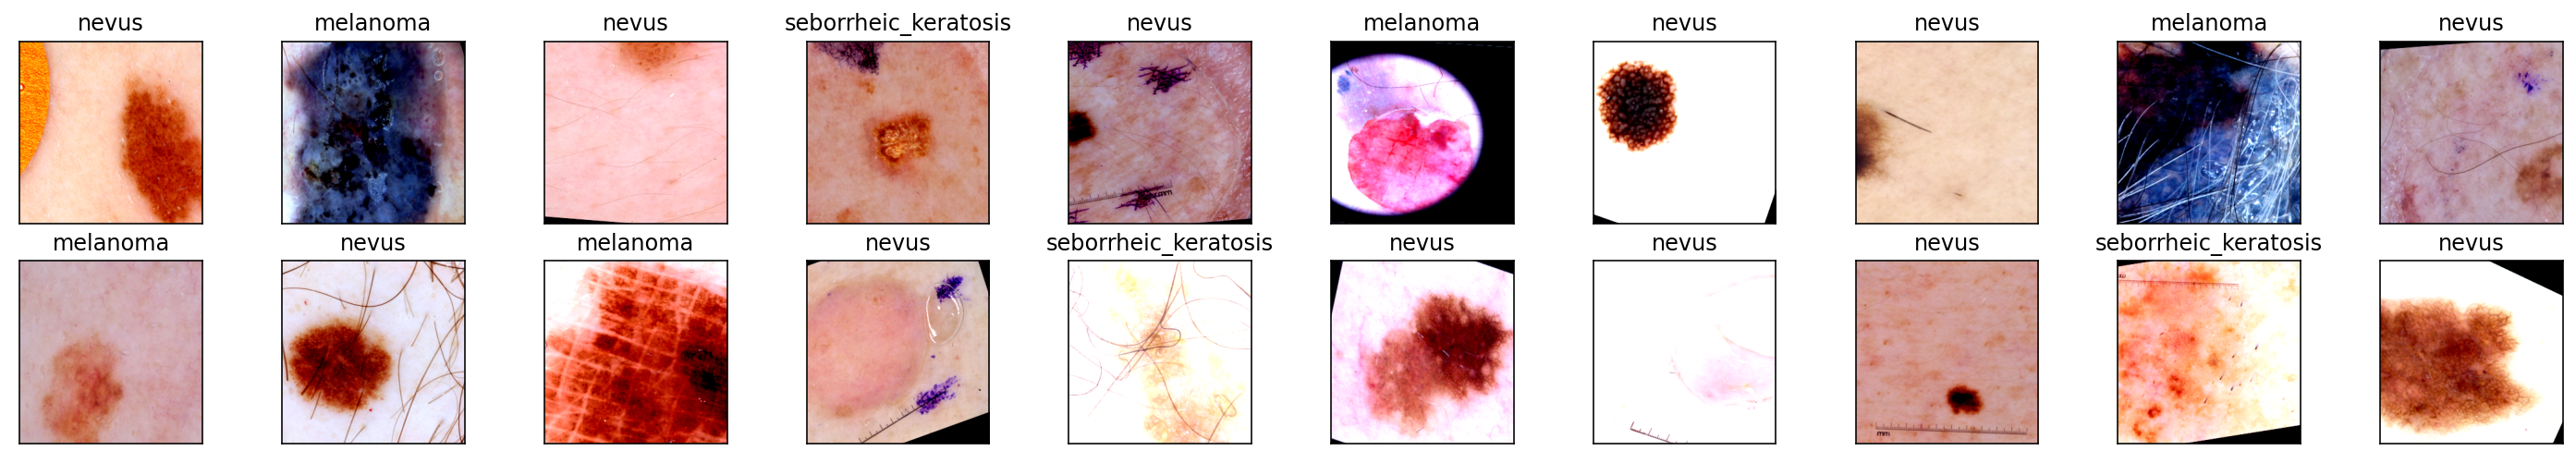

In [ ]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

**Check model architecture for transfer learning**

In [ ]:
model = torch.hub.load('pytorch/vision:v0.6.0', 'inception_v3', aux_logits=True, pretrained=True)
model

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

**Build Model**

In [ ]:
model = models.inception_v3(pretrained=True,aux_logits=True)

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad=False 



classifier = nn.Sequential(OrderedDict([
                                ('fc1',nn.Linear(2048, 1024)),
                                ('relu',nn.ReLU()),
                                ('dropout',nn.Dropout(0.4)),
                                ('fc2',nn.Linear(1024, 3)),
                                ('output',nn.LogSoftmax(dim=1))
                                ]))
# check if CUDA is available
use_cuda = torch.cuda.is_available()


model.fc = classifier
if use_cuda:
    model = model.cuda()

In [ ]:
model

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

**Specify Loss Function and Optimizer**

In [ ]:
# Loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

**Train and Validate the Model**

In [ ]:
def train(n_epochs, train_loader, test_loader, valid_loader , model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # clear the gradient
            optimizer.zero_grad()
            output = model(data).logits
            aux1 = model(data).aux_logits
           
            
            ## find the loss and update the model parameters accordingly
            loss1 = criterion(output, target)
            loss2 = criterion(aux1, target)
            loss = loss1 + 0.4 * loss2 
            
            loss.backward()
            # Perform the optimizer step
            optimizer.step()
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            train_loss += loss.item() * data.size(0)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(valid_loader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()           
            # Pass data acrss the network
            output = model(data)
            loss = criterion(output, target)
            ## update the average validation loss
            valid_loss += loss.item() * data.size(0)
        
        # Calculate the average losses
        train_loss = train_loss/len(train_loader)
        valid_loss = valid_loss/len(valid_loader)
    
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            valid_loss_min = valid_loss
            # print the decremnet in the validation
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min, 
            valid_loss))
            torch.save(model.state_dict(), save_path)
            
    # return trained model
    return model

In [ ]:
# Train our model
model = train(60, train_loader, test_loader, valid_loader,
                       model, optimizer, criterion, use_cuda, 'dermatologist_ai.pt')

Epoch: 1 	Training Loss: 136.064220 	Validation Loss: 31.162913
Validation loss decreased (31.162913 --> 31.162913).  Saving model ...
Epoch: 2 	Training Loss: 133.120129 	Validation Loss: 32.099572
Epoch: 3 	Training Loss: 132.918670 	Validation Loss: 32.444764
Epoch: 4 	Training Loss: 132.334101 	Validation Loss: 32.271001
Epoch: 5 	Training Loss: 132.551964 	Validation Loss: 32.505439
Epoch: 6 	Training Loss: 132.635953 	Validation Loss: 32.605494
Epoch: 7 	Training Loss: 132.266043 	Validation Loss: 32.074192
Epoch: 8 	Training Loss: 132.196050 	Validation Loss: 32.662733
Epoch: 9 	Training Loss: 132.300458 	Validation Loss: 31.808943
Epoch: 10 	Training Loss: 132.580730 	Validation Loss: 32.188092
Epoch: 11 	Training Loss: 132.217589 	Validation Loss: 31.862701
Epoch: 12 	Training Loss: 132.692021 	Validation Loss: 32.469623
Epoch: 13 	Training Loss: 131.817628 	Validation Loss: 32.033398
Epoch: 14 	Training Loss: 132.394038 	Validation Loss: 31.456140
Epoch: 15 	Training Loss: 13

***Evaluate model***

**Load the model**


In [ ]:
# load the model that got the best validation accuracy
model.load_state_dict(torch.load('dermatologist_ai.pt'))

<All keys matched successfully>

**Test the model**

In [ ]:
def test(test_loader, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(test_loader):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [ ]:
# call test function    
test(test_loader, model, criterion, use_cuda)

Test Loss: 0.846334


Test Accuracy: 65% (393/600)


In [ ]:
import glob 
import cv2

train_dir = ["data/train/melanoma", 
               "data/train/nevus",
               "data/train/seborrheic_keratosis"]

test_dir = ["data/test/melanoma", 
              "data/test/nevus",
              "data/test/seborrheic_keratosis"]

def get_images_paths(directory):
  img_paths = []
  for i in range(3):
    for file in glob.glob(directory[i]+"/*.jpg"):
      img_paths.append(file)    
  return img_paths

img_paths = get_images_paths(test_dir)
print(len(img_paths))
print("first five: ", img_paths[:5], "\nMiddle five: ", img_paths[300:305], "\nLast five: ", img_paths[-5:])

600
first five:  ['data/test/melanoma/ISIC_0012258.jpg', 'data/test/melanoma/ISIC_0012356.jpg', 'data/test/melanoma/ISIC_0013457.jpg', 'data/test/melanoma/ISIC_0012395.jpg', 'data/test/melanoma/ISIC_0013277.jpg'] 
Middle five:  ['data/test/nevus/ISIC_0015226.jpg', 'data/test/nevus/ISIC_0015223.jpg', 'data/test/nevus/ISIC_0015224.jpg', 'data/test/nevus/ISIC_0015232.jpg', 'data/test/nevus/ISIC_0015208.jpg'] 
Last five:  ['data/test/seborrheic_keratosis/ISIC_0014588.jpg', 'data/test/seborrheic_keratosis/ISIC_0014500.jpg', 'data/test/seborrheic_keratosis/ISIC_0014629.jpg', 'data/test/seborrheic_keratosis/ISIC_0014590.jpg', 'data/test/seborrheic_keratosis/ISIC_0014587.jpg']


**Save image paths to text file**

In [ ]:
with open("ordered_paths.txt", "w") as txt_file:
    for line in img_paths:
        txt_file.write("".join(line) + "\n")

**Get predictions**

In [ ]:
img_paths = [line.rstrip('\n') for line in open('ordered_paths.txt')] 

print(len(img_paths))
print(img_paths[0])

600
data/test/melanoma/ISIC_0012258.jpg


In [ ]:
print("first five: ", img_paths[:5], "\nMiddle five: ", img_paths[300:305], "\nLast five: ", img_paths[-5:])

first five:  ['data/test/melanoma/ISIC_0012258.jpg', 'data/test/melanoma/ISIC_0012356.jpg', 'data/test/melanoma/ISIC_0013457.jpg', 'data/test/melanoma/ISIC_0012395.jpg', 'data/test/melanoma/ISIC_0013277.jpg'] 
Middle five:  ['data/test/nevus/ISIC_0015226.jpg', 'data/test/nevus/ISIC_0015223.jpg', 'data/test/nevus/ISIC_0015224.jpg', 'data/test/nevus/ISIC_0015232.jpg', 'data/test/nevus/ISIC_0015208.jpg'] 
Last five:  ['data/test/seborrheic_keratosis/ISIC_0014588.jpg', 'data/test/seborrheic_keratosis/ISIC_0014500.jpg', 'data/test/seborrheic_keratosis/ISIC_0014629.jpg', 'data/test/seborrheic_keratosis/ISIC_0014590.jpg', 'data/test/seborrheic_keratosis/ISIC_0014587.jpg']


In [ ]:
import numpy as np
from PIL import Image

def load_image(path):
  image = Image.open(path)
  image = test_transforms(image)
  image = torch.tensor(image, requires_grad=True)
  image = image.unsqueeze(0)
  return image

def get_predictions(img_paths):
  """ Is melanoma? """
  pred_rank1 = [] # Is melanoma?
  pred_rank2 = [] # Is seborrheic?
  for img_path in img_paths:
    img = load_image(img_path)
    #img.to(device)
    prediction = model(img)
    #img.to("cpu")
    pred_rank1.append(float(prediction.data[0][0]))
    pred_rank2.append(float(prediction.data[0][2]))
  return pred_rank1, pred_rank2

model.to("cpu")
model.eval()
print("")

In [ ]:
task1, task2 = get_predictions(img_paths)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


In [ ]:
print("Task 1 predictions: ", len(task1))
print("first five predictions (Task 1): ", task1[:5])

print("Task 2 predictions: ", len(task2))
print("first five predictions (Task 2): ", task2[:5])

Task 1 predictions:  600
first five predictions (Task 1):  [-1.7434089183807373, -1.5812863111495972, -1.5296884775161743, -1.7534584999084473, -1.859948754310608]
Task 2 predictions:  600
first five predictions (Task 2):  [-1.831878423690796, -1.863282322883606, -2.24076509475708, -2.056133508682251, -2.018134832382202]


In [ ]:
import csv
        
with open('results.csv', 'w', newline='') as csvfile:
  doc = csv.writer(csvfile)
  doc.writerow(['Id', 'task_1', 'task_2'])
  for i in range(len(img_paths)):
    doc.writerow([img_paths[i], task1[i], task2[i]])

**Get scores**

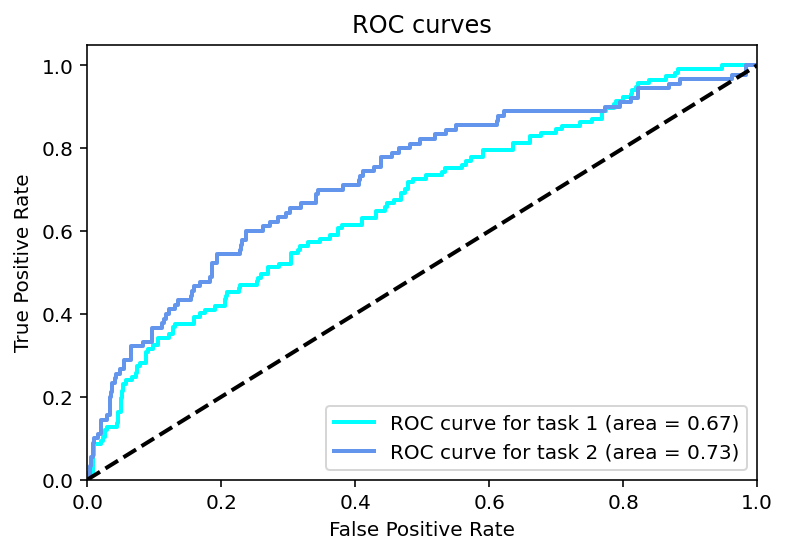

Category 1 Score: 0.669
Category 2 Score: 0.727
Category 3 Score: 0.698


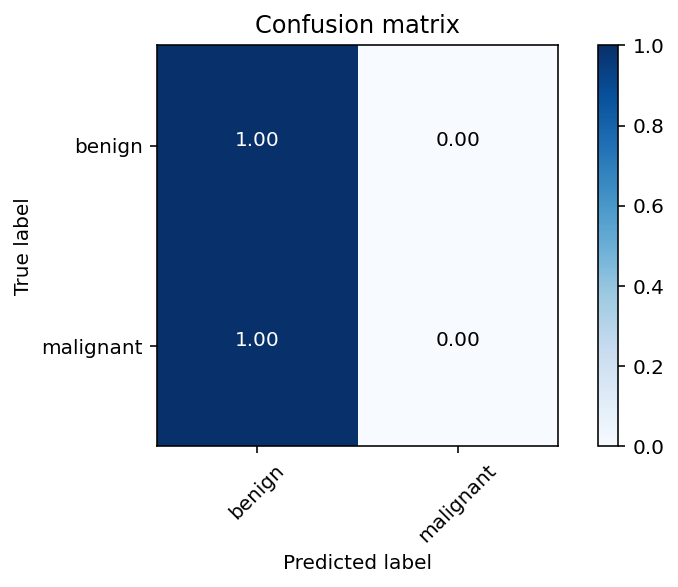

In [ ]:
import pandas as pd
import sys
import itertools
import get_results as results

threshold = 0.5 

# get ground truth labels for test dataset
truth = pd.read_csv('ground_truth.csv')
y_true = truth[["task_1", "task_2"]].values

# get model predictions for test dataset
y_pred = pd.read_csv('results.csv')
y_pred = y_pred[["task_1", "task_2"]].values

# plot ROC curves and print scores
results.plot_roc_auc(y_true, y_pred)
# plot confusion matrix
classes = ['benign', 'malignant']
results.plot_confusion_matrix(y_true[:,0], y_pred[:,0], threshold, classes)